**MODELLING THE DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
DATA= pd.read_csv('DATA.csv')
DATA=pd.DataFrame(DATA)
DATA

,molecule_chembl_id,canonical_smiles,standard_value,standard_units,MOLECULAR WEIGHT,PSA,logP,HBA,HBD
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,nM,281.271,87.20,1.89262,5.0,0.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,nM,415.589,37.38,3.81320,2.0,0.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,nM,421.190,55.84,2.66050,4.0,0.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,nM,293.347,37.38,3.63080,3.0,0.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,nM,338.344,80.52,3.53900,5.0,0.0
...,...,...,...,...,...,...,...,...,...
197,CHEMBL3809833,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccco3)C2=O)c1,50000.0,nM,444.490,69.97,5.88630,3.0,1.0
198,CHEMBL3809053,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,6700.0,nM,474.516,79.20,5.79830,4.0,1.0
199,CHEMBL3818028,CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C...,20000.0,nM,496.605,143.14,1.73670,7.0,3.0
200,CHEMBL4208240,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,5100.0,nM,474.580,150.98,-0.23880,7.0,3.0


For understanding and analysing the data we currently have, lets find some of the features of the data and lets demonstrate then graphically also.  

In [ ]:
DATA.corr(method='pearson')

,standard_value,MOLECULAR WEIGHT,PSA,logP,HBA,HBD
standard_value,1.000000,0.150230,-0.003667,0.162216,0.114981,-0.005917
MOLECULAR WEIGHT,0.150230,1.000000,0.327808,0.476819,0.370042,0.155810
PSA,-0.003667,0.327808,1.000000,-0.266285,0.828952,0.682229
logP,0.162216,0.476819,-0.266285,1.000000,-0.174138,0.015952
HBA,0.114981,0.370042,0.828952,-0.174138,1.000000,0.565186
HBD,-0.005917,0.155810,0.682229,0.015952,0.565186,1.000000


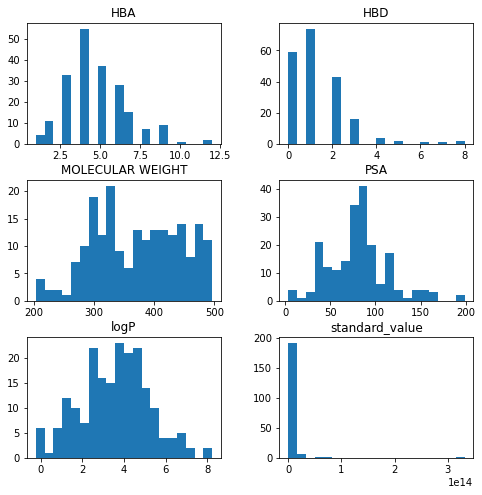

In [ ]:
DATA.iloc[:,:].hist(bins=20,figsize=(8,8),grid=False)
plt.show()

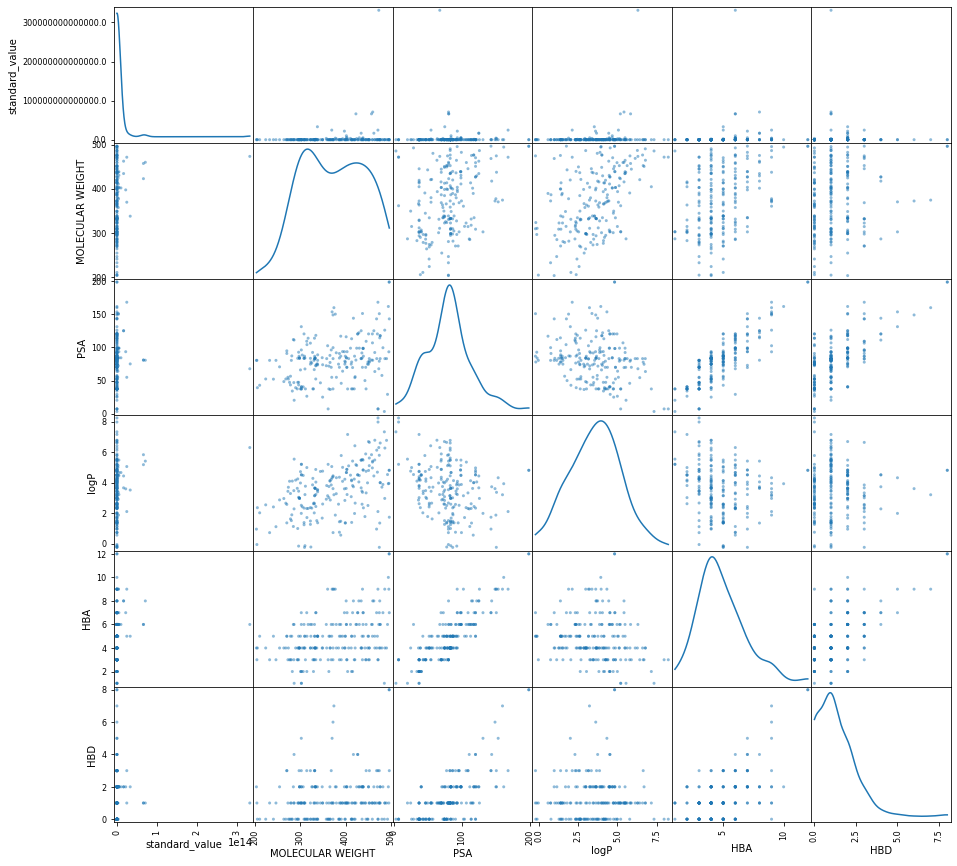

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(DATA,figsize=[15,15], diagonal = "kde")
plt.show()

In [ ]:
DATA.loc[:,['standard_value','MOLECULAR WEIGHT','PSA','logP','HBA','HBD']].mean()

standard_value      3.579780e+12
MOLECULAR WEIGHT    3.721980e+02
PSA                 8.109104e+01
logP                3.557620e+00
HBA                 4.821782e+00
HBD                 1.301980e+00
dtype: float64

In [ ]:
DATA.loc[:,['standard_value','MOLECULAR WEIGHT','PSA','logP','HBA','HBD']].median()

standard_value      25250.0000
MOLECULAR WEIGHT      372.2640
PSA                    82.7000
logP                    3.6295
HBA                     4.0000
HBD                     1.0000
dtype: float64

In [ ]:
MAX=DATA.loc[:,['standard_value','MOLECULAR WEIGHT','PSA','logP','HBA','HBD']].max()
MAX

standard_value      3.311311e+14
MOLECULAR WEIGHT    4.966050e+02
PSA                 1.987600e+02
logP                8.245740e+00
HBA                 1.200000e+01
HBD                 8.000000e+00
dtype: float64

In [ ]:
MIN=DATA.loc[:,['standard_value','MOLECULAR WEIGHT','PSA','logP','HBA','HBD']].min()
MIN

standard_value       50.0000
MOLECULAR WEIGHT    203.1270
PSA                   3.2400
logP                 -0.2425
HBA                   1.0000
HBD                   0.0000
dtype: float64

In [ ]:
range=MAX-MIN
range

standard_value      3.311311e+14
MOLECULAR WEIGHT    2.934780e+02
PSA                 1.955200e+02
logP                8.488240e+00
HBA                 1.100000e+01
HBD                 8.000000e+00
dtype: float64

In [ ]:
DATA.loc[:,['standard_value','MOLECULAR WEIGHT','PSA','logP','HBA','HBD']].std()

standard_value      2.487742e+13
MOLECULAR WEIGHT    7.284809e+01
PSA                 3.347857e+01
logP                1.660943e+00
HBA                 1.946529e+00
HBD                 1.365129e+00
dtype: float64

In [ ]:
DATA.skew()

standard_value      11.743224
MOLECULAR WEIGHT    -0.108770
PSA                  0.531880
logP                 0.006609
HBA                  0.858669
HBD                  2.034602
dtype: float64

In [ ]:
DATA.kurtosis()

standard_value      151.704900
MOLECULAR WEIGHT     -0.911350
PSA                   1.063219
logP                 -0.086090
HBA                   1.173955
HBD                   6.498370
dtype: float64

Lets model the data now

In [ ]:
x=np.array(DATA.xs(['logP','PSA','HBA','HBD'],axis=1))

In [ ]:
y=np.array(DATA.standard_value)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

TRYING SUPPORT VECTOR REGRESSOR IN SVM FOR MODELLING

In [ ]:
#svr with linear kernel
from sklearn.svm import SVR
regr=SVR(kernel='linear')
regr.fit(X_train,y_train)
y_pred_SVR_lin=regr.predict(X_test)
r2_value=r2_score(y_test,y_pred_SVR_lin)
MeanSquareError=mean_squared_error(y_test,y_pred_SVR_lin)
print("R_squared_Value")
print(r2_value)
print(MeanSquareError)

R_squared_Value
-0.020356654534825047
1.6502647810183025e+27


In [ ]:
#svr with polynomial kernel
from sklearn.svm import SVR
regr=SVR(kernel='poly')
regr.fit(X_train,y_train)
y_pred_SVR_poly=regr.predict(X_test)
r2_value=r2_score(y_test,y_pred_SVR_poly)
print("R_squared_Value")
print(r2_value)

R_squared_Value
-0.020356654558005394


There is no any significant change in r2 values when we used polynomial kernel and also when we used linear kernel in svr

Plotting between y_test and the predictions from SVR METHOD

<function matplotlib.pyplot.show(*args, **kw)>

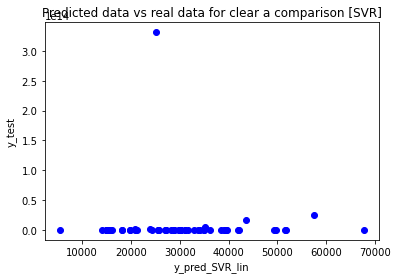

In [ ]:
plt.scatter(y_pred_SVR_lin,y_test,color="blue")
plt.title('Predicted data vs real data for clear a comparison [SVR]' )
plt.xlabel('y_pred_SVR_lin')
plt.ylabel('y_test')
plt.show

MODELLING using ordinary least squares method(OLS METHOD)

In [ ]:
X_train=np.array(X_train , dtype= float)
y_train=np.array(y_train,dtype= float)
X_test=np.array(X_test,dtype=float)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              6.244
Date:                Tue, 13 Oct 2020   Prob (F-statistic):                    0.000125
Time:                        08:16:11   Log-Likelihood:                         -4234.0
No. Observations:                 135   AIC:                                      8476.
Df Residuals:                     131   BIC:                                      8488.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Plotting between y_test and the predictions from OLS METHOD

<function matplotlib.pyplot.show(*args, **kw)>

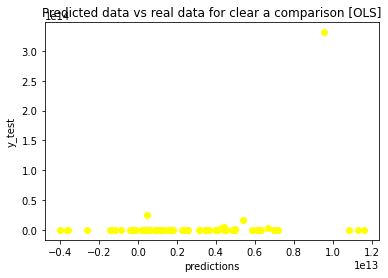

In [ ]:
#now it is important to also know how is predicted data vs real data. this is for just knowing how accurate our findings are.
plt.scatter(predictions,y_test,color="yellow")
plt.title('Predicted data vs real data for clear a comparison [OLS]' )
plt.xlabel('predictions')
plt.ylabel('y_test')
plt.show

Here the model is not that much great since very data points are however not much near to or on the 45 degree line from the centre(y=x line) and the r2 value is just  0.160

TRYING RANDOM FOREST REGRESSOR FOR THE MODEL

In [ ]:
#using random forest
from sklearn.ensemble import RandomForestRegressor
np.random.seed()
model=RandomForestRegressor(n_estimators=2, random_state=50)
model.fit(X_train,y_train)
y_pred_RANDOM=model.predict(X_test)
r2=model.score(X_test,y_test)
print(r2)

0.30374395942173804


Plotting between y_test and the predictions from RANDOM FOREST REGRESSION

<function matplotlib.pyplot.show(*args, **kw)>

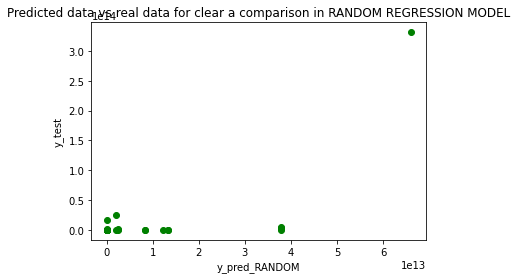

In [ ]:
#now it is important to also know how is predicted data vs real data. this is for just knowing how accurate our findings are.
plt.scatter(y_pred_RANDOM,y_test,color="green")
plt.title('Predicted data vs real data for clear a comparison in RANDOM REGRESSION MODEL')
plt.xlabel('y_pred_RANDOM')
plt.ylabel('y_test')
plt.show

NOW WE END UP IN GETTING A R2 SCORE OF 0.30374395942173804 IN RANDOM REGRESSION which is better than other models we tried.The graph also is better when compared with other models did(since atleast some points the scattered datapoints are near to the 45 degree line).